In [251]:
# auto reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [252]:
# pandas display setting
import pandas as pd
pd.set_option("display.max_rows", None)
import warnings
warnings.filterwarnings('ignore')

In [253]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [254]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
test_id = test['PassengerId']

In [255]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [256]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [257]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [258]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [259]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [260]:
# fill mean in null
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [261]:
cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
b_train = train[cols]
b_test = train['Survived']

In [262]:
base_line_model = KNeighborsClassifier(n_neighbors=3)
base_line_model.fit(b_train, b_test)
print('base line model score:  {}'.format(base_line_model.score(b_train, b_test)))

base line model score:  0.8035914702581369


In [263]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [264]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [265]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [266]:
test.fillna(test['Age'].mean(), inplace=True)
test.fillna(test['Fare'].mean(), inplace=True)

In [267]:
train['Sex'].unique()
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [268]:
train.replace({'Embarked': {'S': 0, 'C': 1, 'Q':2}}, inplace=True)
test.replace({'Embarked': {'S': 0, 'C': 1, 'Q':2}}, inplace=True)
train['Embarked'].unique()

array([ 0.,  1.,  2., nan])

In [269]:
train.fillna(train['Embarked'].mean(), inplace=True)

In [270]:
train.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
test.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
train['Sex'].unique()

array([0, 1])

<Axes: >

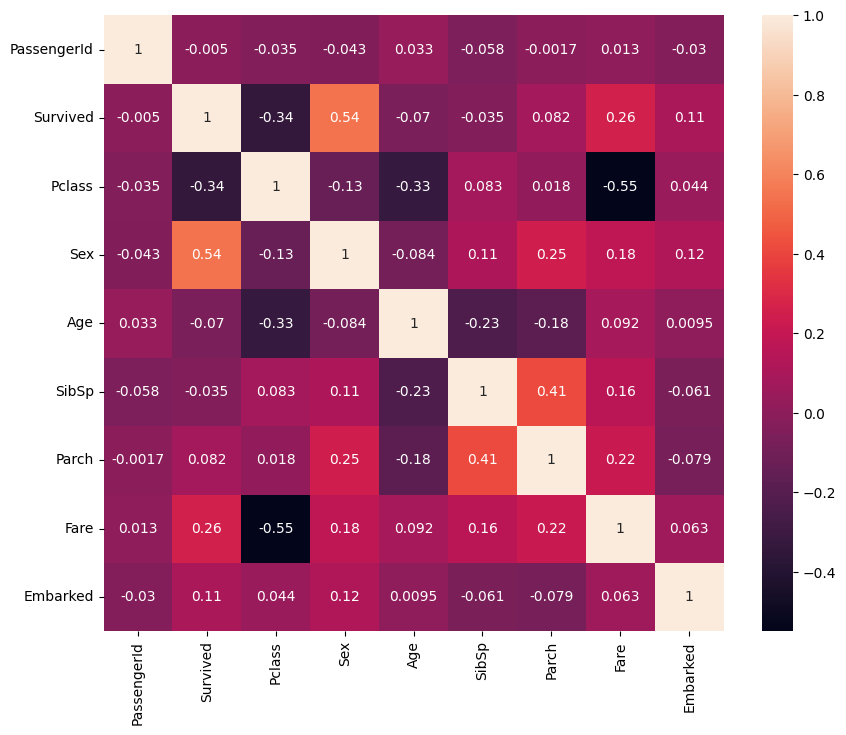

In [271]:
_, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, ax=ax)

In [272]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [273]:
train.drop(['PassengerId','Name', 'SibSp', 'Parch', 'Ticket','Age', 'Cabin'], axis=1, inplace=True)
test.drop(['PassengerId','Name', 'SibSp', 'Parch', 'Ticket', 'Age', 'Cabin'], axis=1, inplace=True)

In [274]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Embarked  891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [275]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Fare      418 non-null    float64
 3   Embarked  418 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 13.2 KB


In [276]:
model = DecisionTreeClassifier()
cols = ['Pclass', 'Sex', 'Fare', 'Embarked']
X_train = train[cols]
y_train = train['Survived']

model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9090909090909091


In [277]:
predict = model.predict(test)

submit_csv = pd.concat([pd.Series(test_id), pd.Series(predict)], axis=1)
submit_csv
submit_csv.columns = (['PassengerId', 'Survived'])
submit_csv.to_csv('output/submition.csv', index=False)